# **Регрессия**


In [59]:
# Если запуск производится в jupyter-notebook,то этот блок кода не нужен
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Подготовка данных


Загружаем датасет

In [2]:
#data = pd.read_csv("/content/drive/My Drive/Регрессия/train.csv")
data = pd.read_csv("train.csv")

In [3]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


Получаем правильные ответы для задачи и удаляем столбцы Price и Id из данных

In [4]:
target = data["Price"]
data.pop("Price")
data.pop("Id")

0       11809
1        3013
2        8215
3        2352
4       13866
        ...  
9995     1260
9996    16265
9997     2795
9998    14561
9999     7202
Name: Id, Length: 10000, dtype: int64

Посмотрим основную информацию и статистические характеристики датасета

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     7887 non-null   float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  object 
 10  Ecology_3      10000 non-null  object 
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   5202 non-null   float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  object 
dtypes: floa

In [6]:
data.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000
mean,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300
std,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341
min,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000
50%,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000
75%,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000
max,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000


Заполняем пропуски данных

In [7]:
data["LifeSquare"] = data["LifeSquare"].fillna(data["LifeSquare"].describe()["50%"])
data["Healthcare_1"] = data["Healthcare_1"].fillna(data["Healthcare_1"].describe()["50%"])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     10000 non-null  float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  object 
 10  Ecology_3      10000 non-null  object 
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   10000 non-null  float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  object 
dtypes: floa

Создаём dummy-переменные

In [9]:
dummy_1 = pd.get_dummies(data.Ecology_2, prefix='Ec_2')
dummy_2 = pd.get_dummies(data.Ecology_2, prefix='Ec_3')
dummy_3 = pd.get_dummies(data.Ecology_2, prefix='Sh_2')

In [10]:
data = pd.concat([data, dummy_1, dummy_2, dummy_3], axis=1)
data.pop("Ecology_2")
data.pop("Ecology_3")
data.pop("Shops_2")

0       B
1       B
2       B
3       B
4       B
       ..
9995    B
9996    A
9997    B
9998    B
9999    B
Name: Shops_2, Length: 10000, dtype: object

Посмотрим на корреляцию между признаками

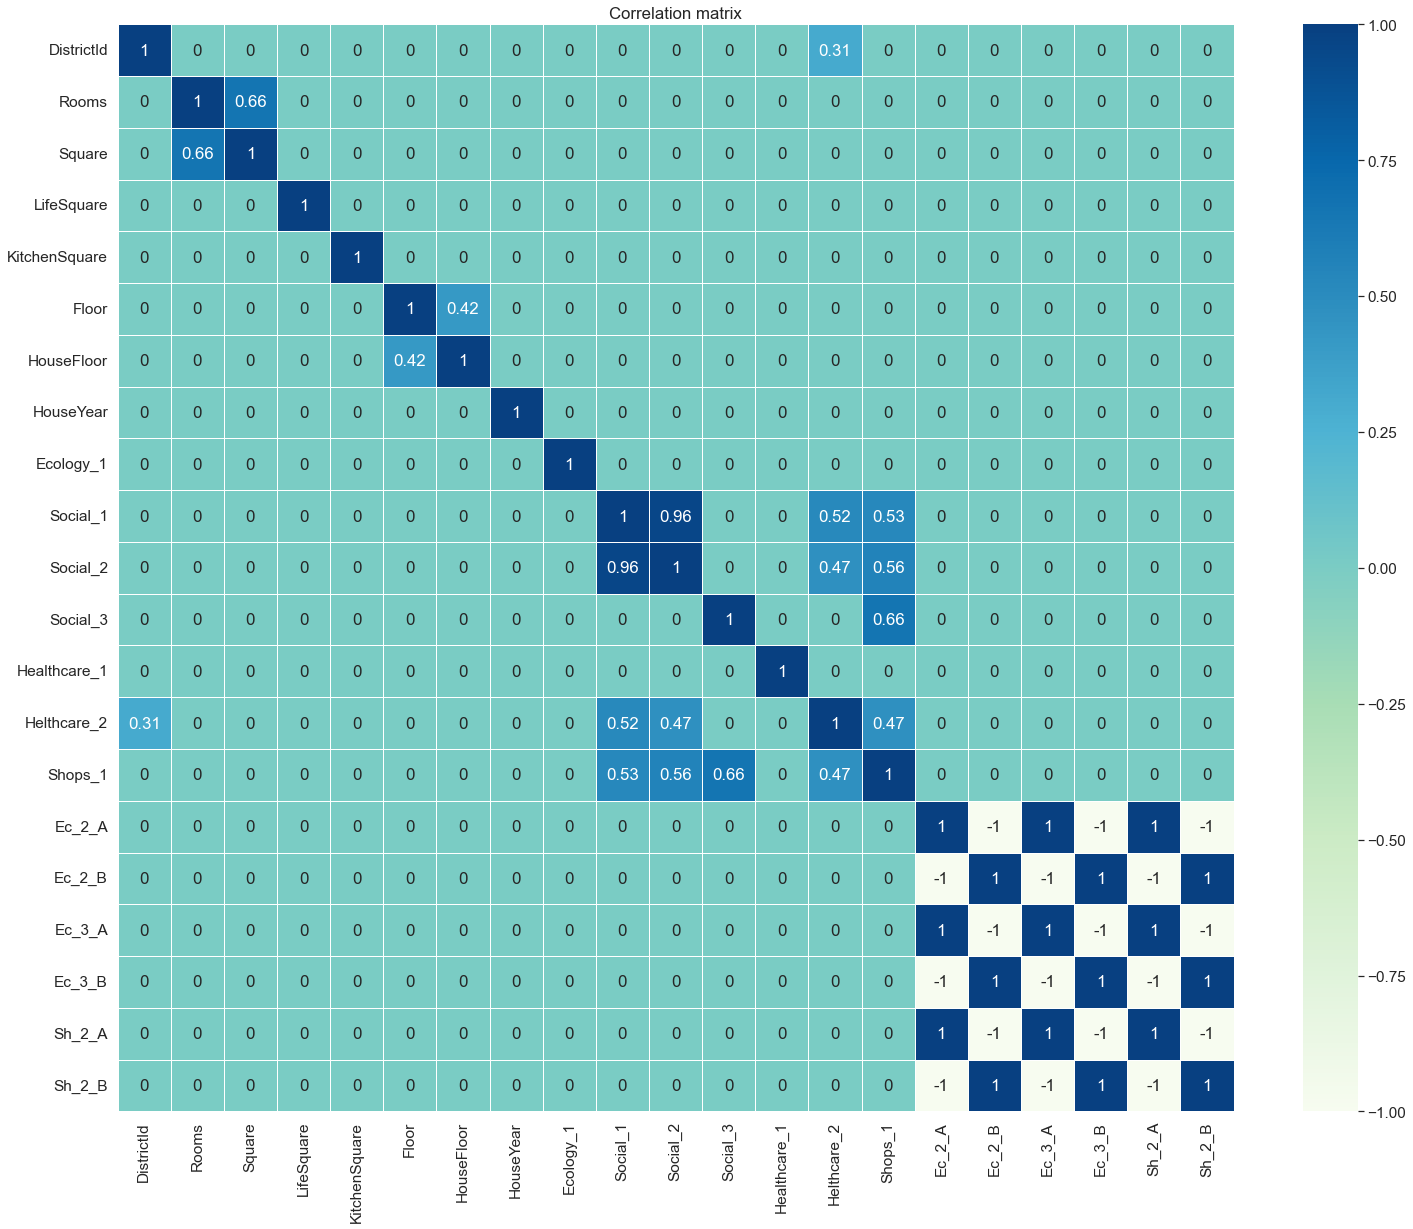

In [13]:
BASE_FEATURE_NAMES = data.columns.tolist()

plt.figure(figsize = (25,20))

sns.set(font_scale=1.4)

corr_matrix = data[BASE_FEATURE_NAMES].corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

In [14]:
data.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ec_2_A,Ec_2_B,Ec_3_A,Ec_3_B,Sh_2_A,Sh_2_B
0,27,3.0,115.027311,32.781260,10.0,4,10.0,2014,0.075424,11,...,0,900.0,0,0,0,1,0,1,0,1
1,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,30,...,1,1183.0,1,0,0,1,0,1,0,1
2,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,33,...,0,240.0,3,1,0,1,0,1,0,1
3,1,1.0,40.409907,32.781260,1.0,10,22.0,1977,0.007122,1,...,0,900.0,0,1,0,1,0,1,0,1
4,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,33,...,2,900.0,0,6,0,1,0,1,0,1


Разбиваем выборку на train и test

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, shuffle=True, random_state=42)

# Линейная регрессия

Создаём модель линейной регрессти и обучаем её





In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr = LinearRegression()

In [19]:
lr.fit(X_train, y_train)

LinearRegression()

Посчитаем значениея r2 метрики на обучающей и тестовой выборках

In [20]:
def calc_metric(model, x_test, y_test, metric):
  y_pred = model.predict(x_test)
  return metric(y_test, y_pred)

In [21]:
from sklearn.metrics import r2_score

In [22]:
r2_train = calc_metric(lr, X_train, y_train, r2_score)
r2_train

0.4866838657930923

In [23]:
r2_test_lr = calc_metric(lr, X_test, y_test, r2_score)
r2_test_lr

0.4580231130572424

Посмотрим на значения коэффициентов модели

In [24]:
lr.coef_

array([ 3.76794661e+02,  3.87764930e+04,  1.20684224e+03, -8.29653067e+01,
        1.04381981e+01,  2.13189349e+03,  9.95094853e+02,  3.16048431e-03,
       -3.81080097e+04,  1.55686848e+03, -2.71439919e+00,  1.03502441e+02,
        7.61587637e+00,  6.92103251e+03, -8.80263312e+02, -7.69970231e+03,
        7.69970231e+03, -7.69970231e+03,  7.69970231e+03, -7.69970231e+03,
        7.69970231e+03])

In [25]:
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = 6, 4

%matplotlib inline

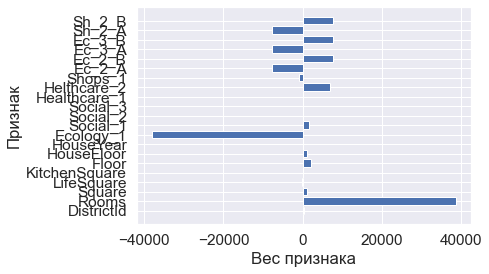

In [26]:
feature_names = list(data.keys())
plt.barh(feature_names, lr.coef_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

Проведём стандартизацию данных и  ещё раз обучим линейную регрессию

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [28]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

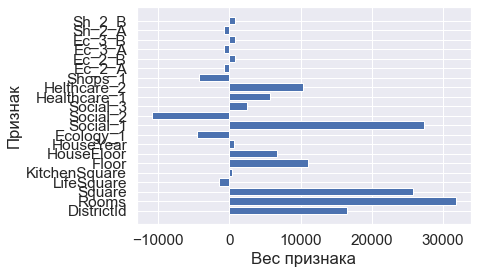

In [29]:
lr.fit(X_train_scaled, y_train)

plt.barh(feature_names, lr.coef_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

In [30]:
lr = LinearRegression()
lr.fit(
    X_train_scaled,
    y_train
)

LinearRegression()

Посчитаем значения r2 метрики на обучающей и тестовой выборках

In [31]:
r2_train = calc_metric(lr, X_train_scaled, y_train, r2_score)
r2_train

0.4866838657930923

In [32]:
r2_test_lr_sc = calc_metric(lr, X_test_scaled, y_test, r2_score)
r2_test_lr_sc

0.4842028138236697

# SVM

Обучим модель Support Vector Regressor из модуля sklearn.svm

In [33]:
from sklearn.svm import SVR

In [34]:
svr = SVR()

In [35]:
svr.fit(X_train_scaled, y_train)

SVR()

Посчитаем метрику r2

In [36]:
r2_train = calc_metric(svr, X_train_scaled, y_train, r2_score)
r2_train

-0.05079068274142551

In [37]:
r2_test_svr = calc_metric(svr, X_test_scaled, y_test, r2_score)
r2_test_svr

-0.06702435941760543

Получилось как-то "не очень". Попробуем что-то поменять, например, параметр C

In [38]:
def c_log_cycle(Model):
  c_values = np.logspace(-1, 6, 36)
  r2_on_valid = []
  r2_on_train = []

  for i, value in enumerate(c_values):
      svr = Model(C=value)
      
      svr.fit(X_train_scaled, y_train)
    
      r2_valid = calc_metric(svr, X_test_scaled, y_test, r2_score)
      r2_train = calc_metric(svr, X_train_scaled, y_train, r2_score)
      r2_on_valid.append(r2_valid)
      r2_on_train.append(r2_train)
      if i % 5 == 0:
          print('C = {}'.format(value))
          print('\tr2_valid = {}'.format(r2_valid))
          print('\tr2_train = {}\n'.format(r2_train))
  return c_values, r2_on_valid, r2_on_train

In [39]:
c_values, r2_on_valid, r2_on_train = c_log_cycle(SVR)

C = 0.1
	r2_valid = -0.07003812888225047
	r2_train = -0.05451054003621936

C = 1.0
	r2_valid = -0.06702435941760543
	r2_train = -0.05079068274142551

C = 10.0
	r2_valid = -0.032702003121649836
	r2_train = -0.010418551596023562

C = 100.0
	r2_valid = 0.18449045843830292
	r2_train = 0.23403521216893797

C = 1000.0
	r2_valid = 0.46278464362872984
	r2_train = 0.5100288089623044

C = 10000.0
	r2_valid = 0.6154905635331787
	r2_train = 0.6451329943400121

C = 100000.0
	r2_valid = 0.6717236499325266
	r2_train = 0.718958009250157

C = 1000000.0
	r2_valid = 0.6080095674219383
	r2_train = 0.7839916140342399



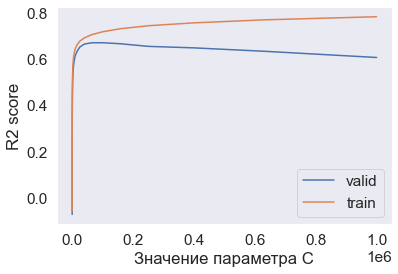

In [40]:
plt.plot(c_values, r2_on_valid, label="valid")
plt.plot(c_values, r2_on_train, label="train")

plt.xlabel('Значение параметра C')
plt.ylabel('R2 score')

plt.legend()
plt.grid()

plt.show()

In [49]:
r2_test_svr = max(r2_on_valid)
r2_test_svr

0.6732343679504206

Видим, что оптимальное значение параметра С равно 100000

# NuSVR

Создадим модель NuSVR и проводём с ней аналогичные действия

In [42]:
from sklearn.svm import NuSVR 
import numpy as np

In [43]:
nusvr = NuSVR()

In [44]:
nusvr.fit(X_train_scaled, y_train)

NuSVR()

In [45]:
r2_test_nusvr = calc_metric(svr, X_test_scaled, y_test, r2_score)
r2_test_nusvr

-0.06702435941760543

In [46]:
c_values, r2_on_valid, r2_on_train = c_log_cycle(NuSVR)

C = 0.1
	r2_valid = -0.02959009196614537
	r2_train = -0.018822945604033636

C = 1.0
	r2_valid = -0.026926336126478434
	r2_train = -0.015627109844172038

C = 10.0
	r2_valid = -0.00034707436423042637
	r2_train = 0.015797810457360728

C = 100.0
	r2_valid = 0.17975728383802414
	r2_train = 0.22272800488045708

C = 1000.0
	r2_valid = 0.4622818466002283
	r2_train = 0.5084695449885618

C = 10000.0
	r2_valid = 0.6146653002716199
	r2_train = 0.6443256195365586

C = 100000.0
	r2_valid = 0.6732343679504206
	r2_train = 0.7198779249084757

C = 1000000.0
	r2_valid = 0.6266754292208364
	r2_train = 0.7858708274716781



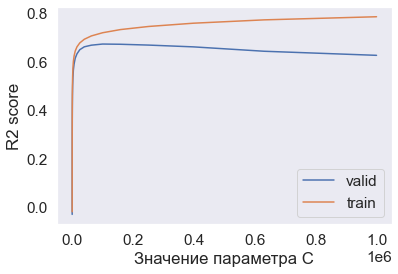

In [47]:
plt.plot(c_values, r2_on_valid, label="valid")
plt.plot(c_values, r2_on_train, label="train")

plt.xlabel('Значение параметра C')
plt.ylabel('R2 score')

plt.legend()
plt.grid()

plt.show()

In [48]:
r2_test_nusvr = max(r2_on_valid)
r2_test_nusvr

0.6732343679504206

# GradientBoosting

In [108]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [109]:
gb = HistGradientBoostingRegressor()
gb.fit(X_train, y_train)

HistGradientBoostingRegressor()

In [110]:
r2_test_gb = calc_metric(gb, X_test, y_test, r2_score)
r2_test_gb

0.7556486576438068

Составим сравнительную таблицу моделей

In [125]:
models = ["LR", "LR with scale data", "SVR c=1", "SVR c=100000", "NuSVR c=1", "NuSVR c=100000", "GradientBoosting"]
scores = [0.45802, 0.4842, -0.067, 0.67172, 0, 0.67323, 0.755648]
models_tabel = pd.DataFrame({"Model":models, "R2_score":scores})
models_tabel

,Model,R2_score
0,LR,0.458020
1,LR with scale data,0.484200
2,SVR c=1,-0.067000
3,SVR c=100000,0.671720
4,NuSVR c=1,0.000000
5,NuSVR c=100000,0.673230
6,GradientBoosting,0.755648


# Препроцессинг тестовых данных

Считаем данные из файла и выведем основную информацию

In [126]:
#test_data = pd.read_csv("/content/drive/My Drive/Регрессия/test.csv")
test_data = pd.read_csv("test.csv")

In [127]:
test_data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
4,746,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B


In [128]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

Удалим из базы данных столбец Id

In [129]:
id = test_data["Id"]

In [130]:
test_data.pop("Id")

0        4567
1        5925
2         960
3        3848
4         746
        ...  
4995    10379
4996    16138
4997     3912
4998     5722
4999    11004
Name: Id, Length: 5000, dtype: int64

Заполним пропуски и избавимся от категориальных переменных

In [131]:
test_data.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


In [132]:
test_data["LifeSquare"] = test_data["LifeSquare"].fillna(test_data["LifeSquare"].median())
test_data["Healthcare_1"] = test_data["Healthcare_1"].fillna(test_data["Healthcare_1"].median())

In [133]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     5000 non-null   int64  
 1   Rooms          5000 non-null   float64
 2   Square         5000 non-null   float64
 3   LifeSquare     5000 non-null   float64
 4   KitchenSquare  5000 non-null   float64
 5   Floor          5000 non-null   int64  
 6   HouseFloor     5000 non-null   float64
 7   HouseYear      5000 non-null   int64  
 8   Ecology_1      5000 non-null   float64
 9   Ecology_2      5000 non-null   object 
 10  Ecology_3      5000 non-null   object 
 11  Social_1       5000 non-null   int64  
 12  Social_2       5000 non-null   int64  
 13  Social_3       5000 non-null   int64  
 14  Healthcare_1   5000 non-null   float64
 15  Helthcare_2    5000 non-null   int64  
 16  Shops_1        5000 non-null   int64  
 17  Shops_2        5000 non-null   object 
dtypes: float

In [134]:
dummy_1 = pd.get_dummies(test_data.Ecology_2, prefix='Ec_2')
dummy_2 = pd.get_dummies(test_data.Ecology_2, prefix='Ec_3')
dummy_3 = pd.get_dummies(test_data.Ecology_2, prefix='Sh_2')

In [135]:
test_data = pd.concat([test_data, dummy_1, dummy_2, dummy_3], axis=1)
test_data.pop("Ecology_2")
test_data.pop("Ecology_3")
test_data.pop("Shops_2")

0       B
1       A
2       B
3       B
4       B
       ..
4995    B
4996    B
4997    B
4998    B
4999    B
Name: Shops_2, Length: 5000, dtype: object

In [136]:
test_data.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ec_2_A,Ec_2_B,Ec_3_A,Ec_3_B,Sh_2_A,Sh_2_B
0,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,24,...,0,1036.0,1,1,0,1,0,1,0,1
1,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,2,...,1,900.0,0,0,0,1,0,1,0,1
2,27,2.0,59.463678,32.925087,9.0,19,19.0,1977,0.211401,9,...,0,900.0,0,1,0,1,0,1,0,1
3,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,2,...,0,900.0,0,0,0,1,0,1,0,1
4,74,1.0,53.837056,32.925087,1.0,8,17.0,1977,0.309479,35,...,4,990.0,0,6,0,1,0,1,0,1


In [137]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     5000 non-null   int64  
 1   Rooms          5000 non-null   float64
 2   Square         5000 non-null   float64
 3   LifeSquare     5000 non-null   float64
 4   KitchenSquare  5000 non-null   float64
 5   Floor          5000 non-null   int64  
 6   HouseFloor     5000 non-null   float64
 7   HouseYear      5000 non-null   int64  
 8   Ecology_1      5000 non-null   float64
 9   Social_1       5000 non-null   int64  
 10  Social_2       5000 non-null   int64  
 11  Social_3       5000 non-null   int64  
 12  Healthcare_1   5000 non-null   float64
 13  Helthcare_2    5000 non-null   int64  
 14  Shops_1        5000 non-null   int64  
 15  Ec_2_A         5000 non-null   uint8  
 16  Ec_2_B         5000 non-null   uint8  
 17  Ec_3_A         5000 non-null   uint8  
 18  Ec_3_B  

In [138]:
predictions = gb.predict(test_data)

Создадим Dataframe с предсказаниями модели и запишем его в файл

In [139]:
df = pd.DataFrame({"Id": id, "Price": predictions})
df

,Id,Price
0,4567,162527.912470
1,5925,119474.003809
2,960,150839.070578
3,3848,127907.353636
4,746,197265.190373
...,...,...
4995,10379,175026.974910
4996,16138,345005.444580
4997,3912,142742.834564
4998,5722,185839.550783


In [140]:
df.to_csv("/content/drive/My Drive/Регрессия/output.csv", index=False)